In [1]:
import tensorflow as tf
import os

In [8]:
# To avoid the Out of Memory Error by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
import cv2 
import imghdr # To check file extensions(Deprecated)
import numpy as np
from matplotlib import pyplot as plt

C:\Users\Sumedh\AppData\Local\Temp\ipykernel_10820\3101795948.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr # To check file extensions(Deprecated)


In [3]:
# Variable to hold our Directory
data_dir = 'data' 

In [4]:
img_exts = ['jpg', 'png', 'jpeg', 'bmp']

In [5]:
for image_class in os.listdir(data_dir):  #--> Navigating to the directory
    for image in os.listdir(os.path.join(data_dir, image_class)):  #--> Navigating to the sub-directory i.e. joining the path
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)  #--> Checking if every image can be accessed using opencv
            tip = imghdr.what(image_path) #--> Checking if every image has the listed file extensions
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))  #--> If not remove the image
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\05-12-21-happy-people.jpg
Issue with image data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image data\happy\1-2.jpg
Issue with image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image data\happy\154006829.jpg
Issue with image data\happy\170404-happy-workers-feature.jpg
Issue with image data\happy\1902539.jpg
Issue with image data\happy\1902540.jpg
Issue with image data\happy\1902587.jpg
Issue with image data\happy\1920px-face-smile.svg_.png.jpg
Issue with image data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image data\happy\60632274._UY200_.jpg
Issue with image data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with image data\happy\7-principles-of-successful-and-happy-people.png
Issue with image data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg


In [13]:
# Allows to load the data pipeline instead of comlpetely loading dataset into the memory
# tf.data.Dataset

In [6]:
# Using the keras functionality for the same task
# Does some preprocessing at the background (tf.keras.utils.image_dataset_from_directory??)
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [7]:
# To access the data as it is not completely loaded into the memory
data_itr = data.as_numpy_iterator()
# Get a batch of images from the iterator
batch = data_itr.next()
# Images represented as numpy arrays
batch[0].shape   #--> Here 0 is of batch representing images
# To represent labels  (0-Happy ; 1-Sad)
batch[1]  #--> Here 1 is of batch representing labels

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [8]:
# Ideally we need the values to be really small for optimization, so dividing by 255 to limit it to 1
scaled = batch[0]/255
scaled

array([[[[4.86856610e-01, 5.14307618e-01, 4.82935041e-01],
         [5.04143715e-01, 5.31594694e-01, 5.00222147e-01],
         [5.25934458e-01, 5.53385437e-01, 5.22012889e-01],
         ...,
         [7.95067430e-01, 8.56357217e-01, 8.53163302e-01],
         [7.85186887e-01, 8.47931981e-01, 8.44010413e-01],
         [7.72985578e-01, 8.35730672e-01, 8.31809103e-01]],

        [[4.86856610e-01, 5.14307618e-01, 4.82935041e-01],
         [5.04143715e-01, 5.31594694e-01, 5.00222147e-01],
         [5.25934458e-01, 5.53385437e-01, 5.22012889e-01],
         ...,
         [7.95067430e-01, 8.56357217e-01, 8.53163302e-01],
         [7.85186887e-01, 8.47931981e-01, 8.44010413e-01],
         [7.72985578e-01, 8.35730672e-01, 8.31809103e-01]],

        [[4.86856610e-01, 5.14307618e-01, 4.82935041e-01],
         [5.04143715e-01, 5.31594694e-01, 5.00222147e-01],
         [5.25934458e-01, 5.53385437e-01, 5.22012889e-01],
         ...,
         [7.95276284e-01, 8.56566131e-01, 8.53372216e-01],
         [

In [9]:
# As we are building a data pipeline, it is better to scale images while loading into the pipeline  
data = data.map(lambda x, y: (x/255, y))  #--> x - represents images(independent) and y - represents target variable
scaled_itr = data.as_numpy_iterator()
batch = scaled_itr.next()

In [10]:
# Splitting the Dataset
# len(data)
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [11]:
# Assigning the images according to set split
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [12]:
# Developing the Model
from tensorflow.keras.models import Sequential   #--> Helps to arrange Keras layer in order and specify the neural network
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [13]:
model = Sequential()

In [14]:
# Layers can be added by directly passing them in Sequential API or by using the 'add' method
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # As we have 2 classes, sigmoid is used as it gives the output in the range of 0 and 1
# For multiple classes, use Softmax function

In [15]:
# 'adam' is optimizer
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [17]:
# Training the Model
logdir = 'logs'

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [19]:
''' 'fit' is the method for training
Here train  is the training data(7 batches of 32 images)
1 epoch is 1 run over entire training data(20 in this case)
then perfom evaluation on validation data(2 batches of 32 images) for real-time check'''

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 13s 1s/step - loss: 0.9080 - accuracy: 0.5223 - val_loss: 0.6854 - val_accuracy: 0.6094
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6630 - accuracy: 0.5268 - val_loss: 0.6073 - val_accuracy: 0.5938
Epoch 3/20
7/7 [==============================] - 9s 998ms/step - loss: 0.6158 - accuracy: 0.5714 - val_loss: 0.5822 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 0.5566 - accuracy: 0.7589 - val_loss: 0.5211 - val_accuracy: 0.8125
Epoch 5/20
7/7 [==============================] - 20s 2s/step - loss: 0.5035 - accuracy: 0.8125 - val_loss: 0.4519 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 20s 2s/step - loss: 0.4422 - accuracy: 0.8259 - val_loss: 0.3413 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 19s 2s/step - loss: 0.3542 - accuracy: 0.8482 - val_loss: 0.4093 - val_accuracy: 0.7812
Epoch 8/20
7/7 [=================

In [20]:
hist.history

{'loss': [0.9080411791801453,
  0.6630093455314636,
  0.6158303022384644,
  0.5566225051879883,
  0.5034525990486145,
  0.4421669542789459,
  0.3542262017726898,
  0.39457184076309204,
  0.35105636715888977,
  0.2827041447162628,
  0.3393762409687042,
  0.3078153431415558,
  0.22555102407932281,
  0.19074633717536926,
  0.1577739715576172,
  0.13748781383037567,
  0.09384644031524658,
  0.08030896633863449,
  0.0483124814927578,
  0.0356760248541832],
 'accuracy': [0.5223214030265808,
  0.5267857313156128,
  0.5714285969734192,
  0.7589285969734192,
  0.8125,
  0.8258928656578064,
  0.8482142686843872,
  0.8214285969734192,
  0.8839285969734192,
  0.8883928656578064,
  0.8526785969734192,
  0.9017857313156128,
  0.9375,
  0.9285714030265808,
  0.9553571343421936,
  0.9598214030265808,
  0.9776785969734192,
  0.9776785969734192,
  0.9910714030265808,
  0.9910714030265808],
 'val_loss': [0.6854348182678223,
  0.6073235869407654,
  0.5821661949157715,
  0.5211037397384644,
  0.45189189910

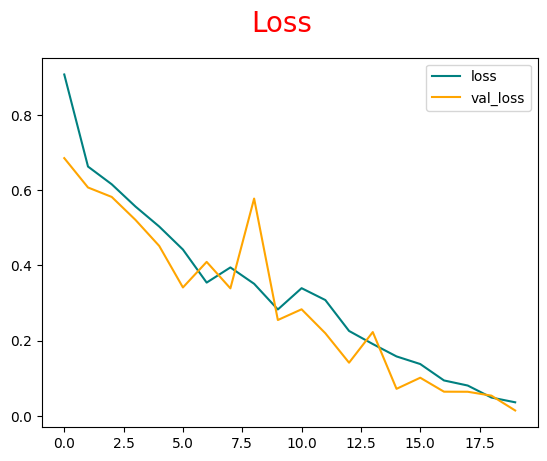

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20, color='red')
plt.legend(loc="upper right")
plt.show()
# If validation loss is increasing, it shows model is overfitted

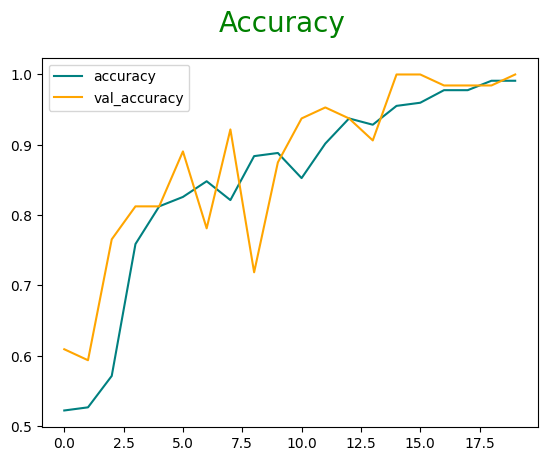

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20, color='green')
plt.legend(loc="upper left")
plt.show()

In [23]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [24]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
# 'predict' is the method for testing
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 146ms/step


In [25]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


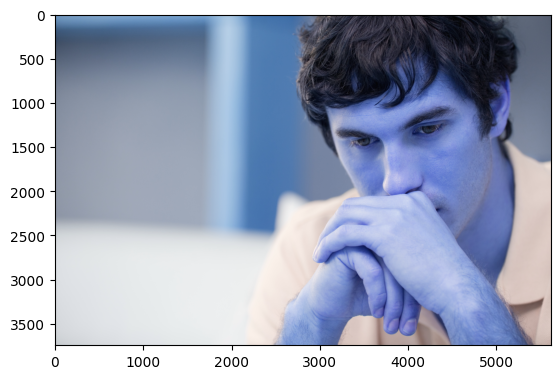

In [26]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

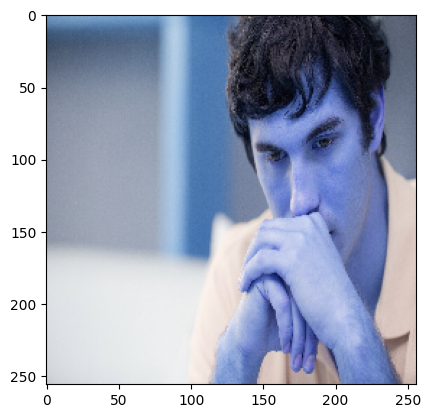

In [27]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [28]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 167ms/step


In [29]:
yhat

array([[0.9445974]], dtype=float32)

In [30]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
